# Wine Recommendation System

by Prateek keerthi(01119787) and Bisi Adeniran (01108146)

**Dataset**: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_datareader.data as web
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
df = pd.read_csv("winemag130k.csv",index_col=0)

In [3]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine130k.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
country_group = wine130k.groupby('country').size().rename('Wines').reset_index()
fig = px.pie(country_group, 
             values='Wines', names='country', 
             color_discrete_sequence=px.colors.sequential.RdBu,
            title='Country wise distribution of Wine Samples',
            width=800,
            height=500)

fig.update_layout(
    margin=dict(l=25, r=20, t=30, b=50),
    paper_bgcolor="#ECEFF9",
)
fig.show()

NameError: name 'px' is not defined

In [6]:
wine130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


As we see that most of the columns are of object data type, we tried to use as much as float and int data columns for exploratory data analysis.

## Exploratory Data Analysis

### Finding out the relationship between Price and Points¶


In [6]:
Price=wine130k['price']

In [7]:
Points=wine130k['points']

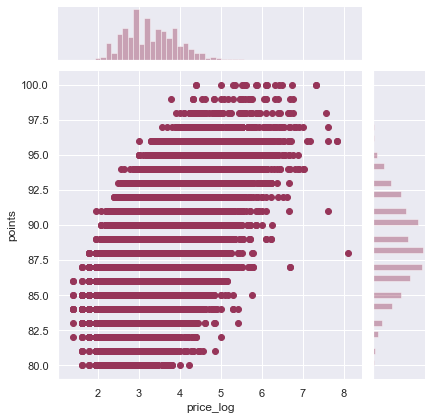

In [10]:
df['price_log'] = np.log(df['price'])
_ = sns.jointplot(data=df, x='price_log', y='points', color='#963559')

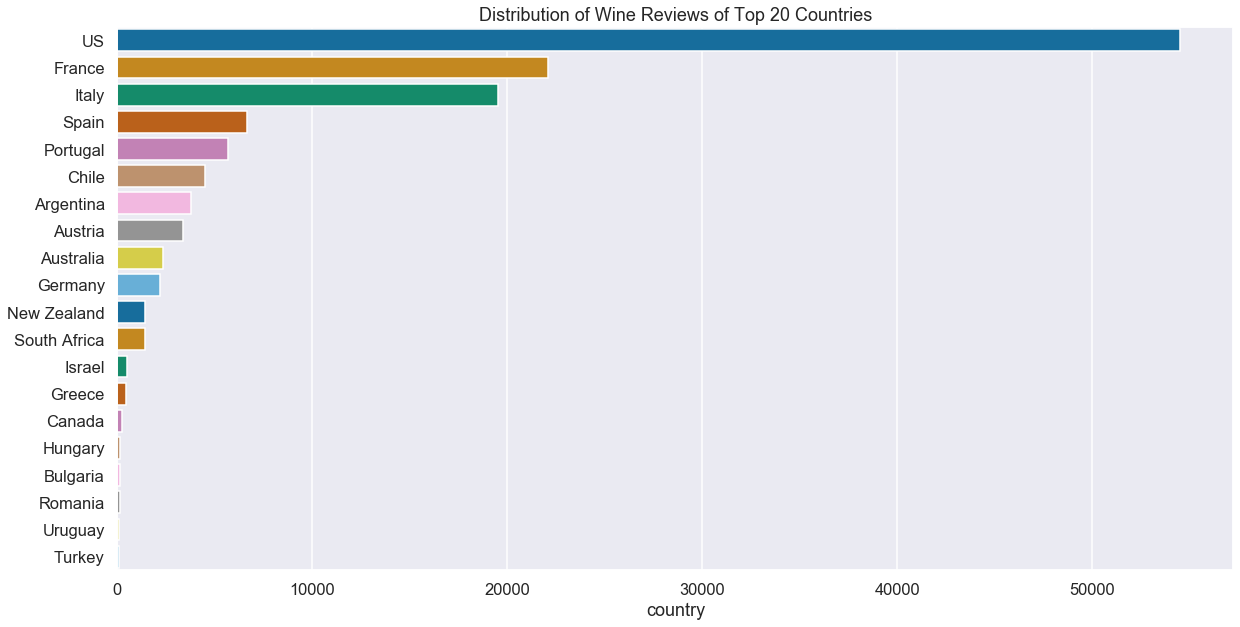

In [12]:
sns.set_context('talk')
plt.figure(figsize=(20,10))
cnt = df['country'].value_counts().to_frame()[0:20]

sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='colorblind',orient='h')
plt.title('Distribution of Wine Reviews of Top 20 Countries');

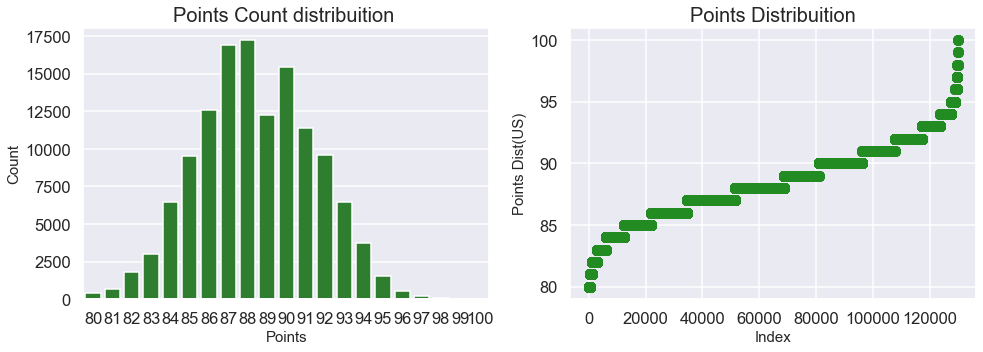

In [14]:

plt.figure(figsize=(16,5))

plt.subplot(1,2,1) 
g = sns.countplot(x='points', data=df, color='forestgreen') 
g.set_title("Points Count distribuition ", fontsize=20) 
g.set_xlabel("Points", fontsize=15) 
g.set_ylabel("Count", fontsize=15)

plt.subplot(1,2,2)  
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen') 
plt.xlabel('Index', fontsize=15)  
plt.ylabel('Points Dist(US)', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 

plt.show() #rendering the graphs

In [16]:
country_group = df.groupby('country').size().rename('Wines').reset_index()
fig = px.pie(country_group, 
             values='Wines', names='country', 
             color_discrete_sequence=px.colors.sequential.RdBu,
            title='Country wise distribution of Wine Samples',
            width=800,
            height=500)

fig.update_layout(
    margin=dict(l=25, r=20, t=30, b=50),
    paper_bgcolor="#ECEFF9",
)
fig.show()

NameError: name 'px' is not defined

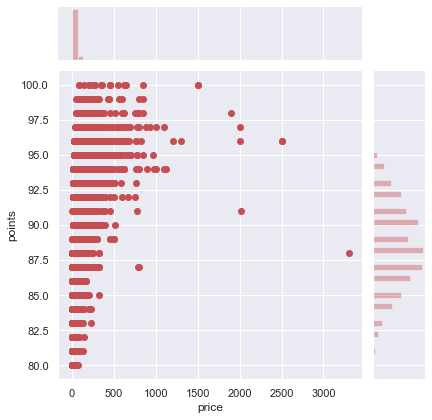

In [9]:
import warnings
warnings.simplefilter("ignore")
sns.jointplot( x = wine130k['price'],y = wine130k['points'],color='r');

We see that the minimum points that are given by the user is 80 and the price of maximum wines are below 500

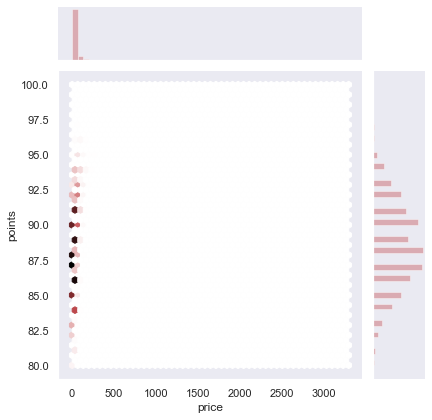

In [10]:
import warnings
warnings.filterwarnings('ignore')
with sns.axes_style("dark"):
    sns.jointplot(x=Price, y=Points, data=wine130k, kind="hex", color="r")

In [11]:
corelation=wine130k.corr()
corelation

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


### Count of Wine Reviews by different countries

In [12]:
count = wine130k['country'].value_counts().to_frame()[0:16]
dfgr8tr = (count['country'] >146)
print(dfgr8tr)

US               True
France           True
Italy            True
Spain            True
Portugal         True
Chile            True
Argentina        True
Austria          True
Australia        True
Germany          True
New Zealand      True
South Africa     True
Israel           True
Greece           True
Canada           True
Hungary         False
Name: country, dtype: bool


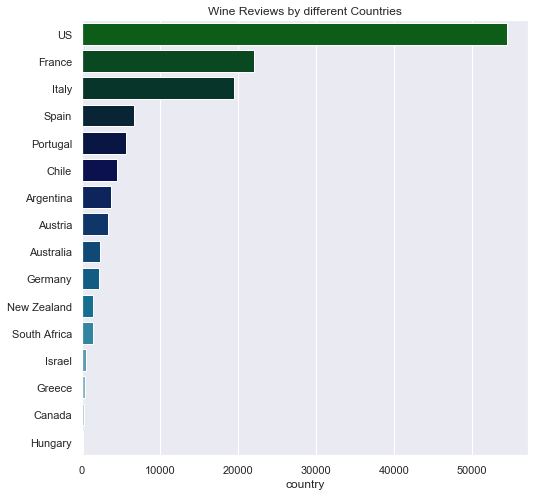

In [13]:
plt.figure(figsize=(8, 8))
sns.barplot(x= count['country'], y =count.index, data=count, palette='ocean',orient='h')
plt.title('Wine Reviews by different Countries');

US has given maximun number of reviews and hungary has given the least

###  Total number of points given by different users

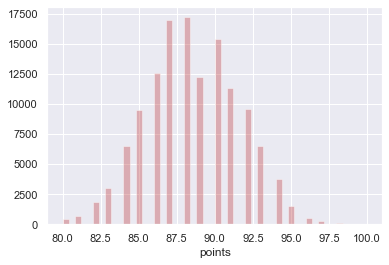

In [14]:
sns.distplot(wine130k['points'], color='r', kde=False);

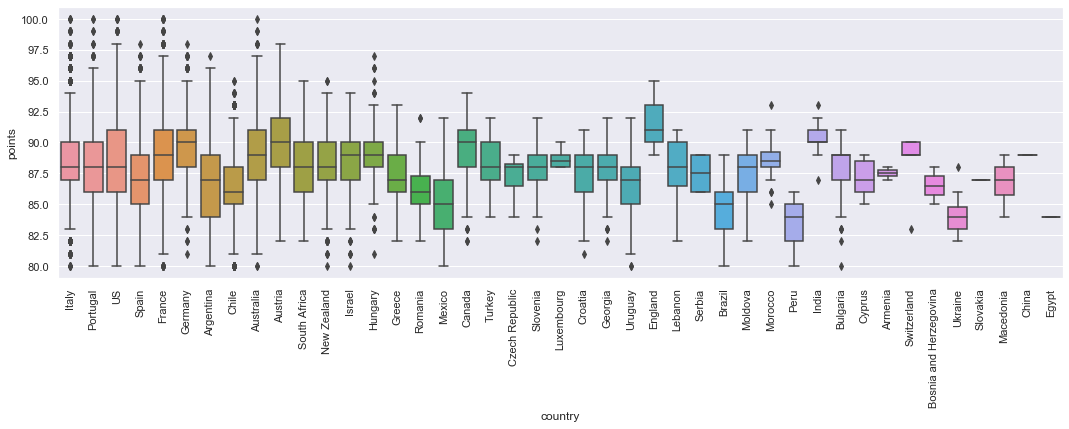

In [15]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=wine130k['country'], y=wine130k['points'], data=wine130k);
plt.xticks(rotation=90);


* Most of the ratings are between 87.5 and 90.0
* England has the topped the table of having the highest average rating of the wine
* It is seen that all the varieties have atleast minimum of 80 points.

### Relation between Price and Variety

Text(0.5, 1.0, 'varieties with most expensive wine')

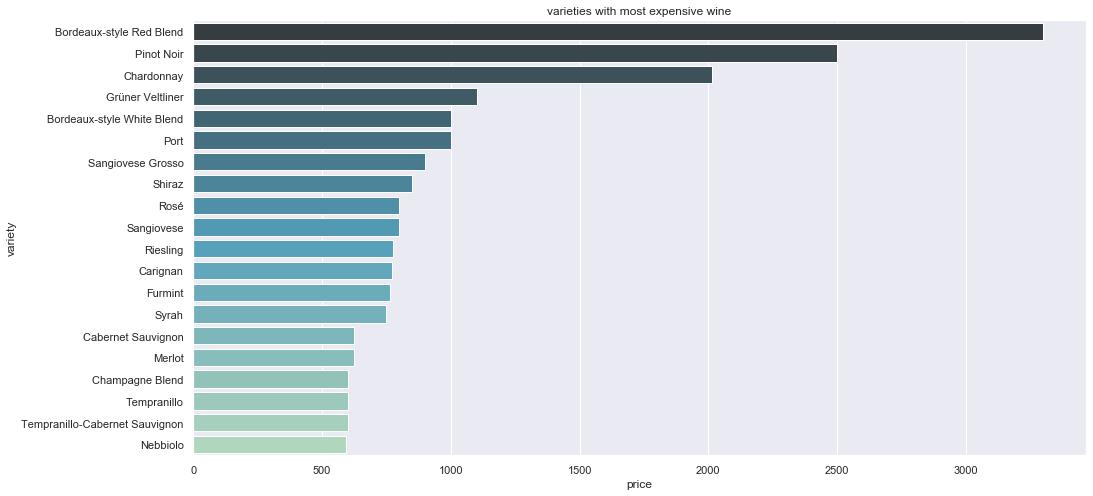

In [16]:
fig = plt.subplots(figsize=(16,8))
count = wine130k.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = count['price'], y = count.index, palette= 'GnBu_d')
plt.title("varieties with most expensive wine")



* Bordeaux-style Red Blend is the one that is most expensive

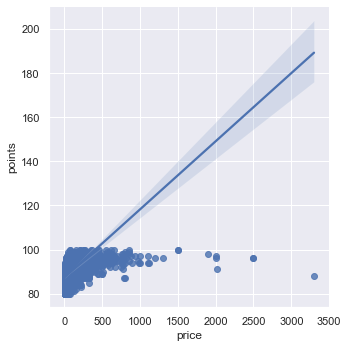

In [17]:
sns.lmplot(x="price", y="points", data=wine130k)

* It is seen that most of the wines prices are between 0 to 1000
* The wine with highest price is 3300  
* The minimum rating points that are given to the wine starts from 80

### Winery with price and points

Text(0.5, 1.0, 'The most expensive wine is prepared in')

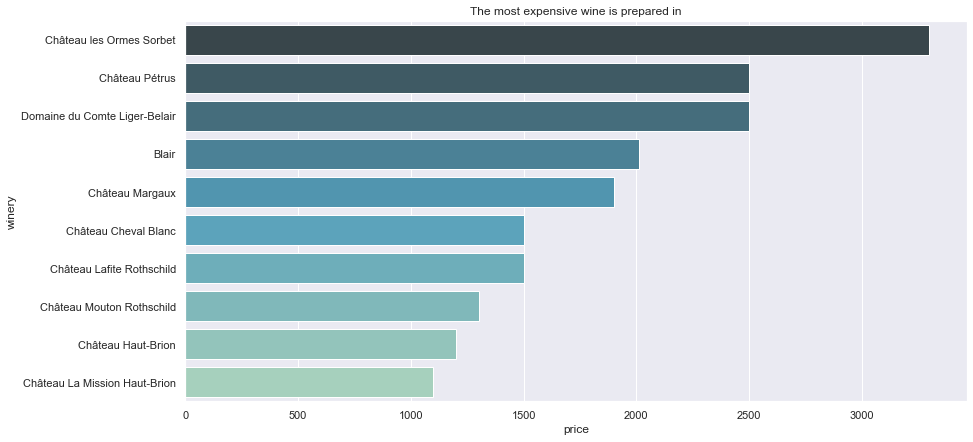

In [18]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in')


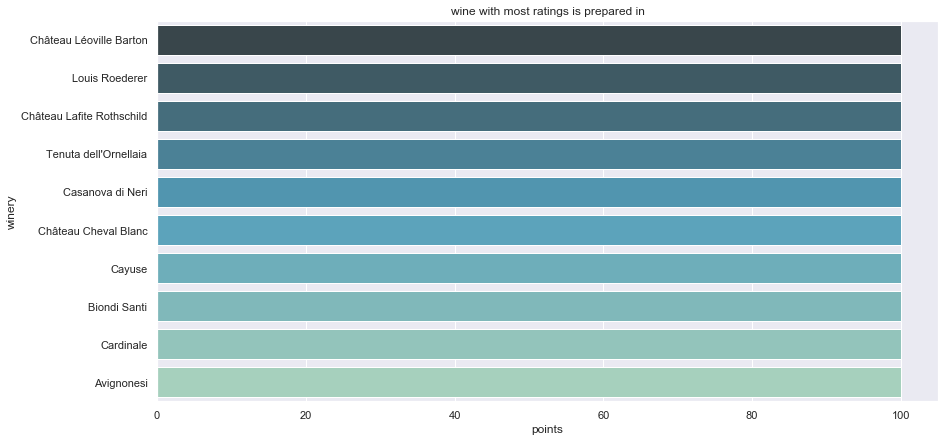

In [19]:
plt.subplots(figsize=(14,7))
cnt = wine130k.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:10]
sns.barplot(cnt['points'], y = cnt.index, palette = 'GnBu_d')
plt.title('wine with most ratings is prepared in');

### Province with price and points

Text(0.5, 1.0, 'The most expensive wine is prepared in the province')

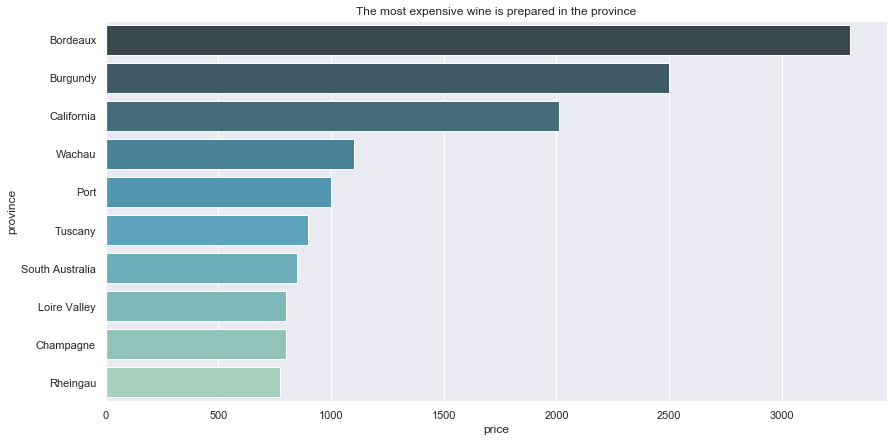

In [20]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in the province')


Text(0.5, 1.0, 'The least price wine is prepared in the province')

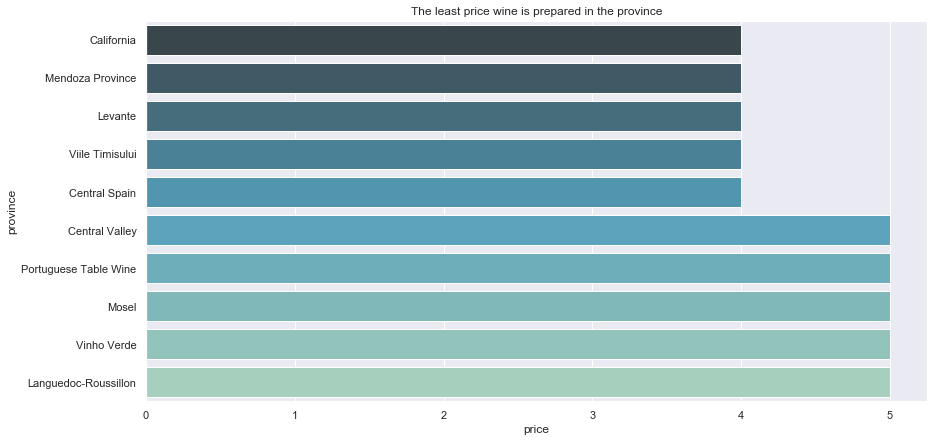

In [21]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].min().to_frame().sort_values(by='price')[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The least price wine is prepared in the province')

In [22]:
count = wine130k.groupby(['province','variety','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Blues')

,province,variety,points,count,min,max,mean
0,Bordeaux,Bordeaux-style Red Blend,100,4,150.000000,1500.000000,877.250000
1,South Australia,Shiraz,99,1,850.000000,850.000000,850.000000
2,Bordeaux,Bordeaux-style White Blend,100,1,848.000000,848.000000,848.000000
3,Champagne,Chardonnay,99,1,800.000000,800.000000,800.000000
4,Rheingau,Riesling,98,1,775.000000,775.000000,775.000000
5,Tokaji,Furmint,94,1,764.000000,764.000000,764.000000
6,Bordeaux,Bordeaux-style Red Blend,98,4,92.000000,1900.000000,683.000000
7,Port,Port,100,1,650.000000,650.000000,650.000000
8,Champagne,Chardonnay,100,1,617.000000,617.000000,617.000000
9,Northern Spain,Tempranillo-Cabernet Sauvignon,92,1,600.000000,600.000000,600.000000


In [23]:
count = wine130k.groupby(['taster_name','variety'])['points'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Blues')

,taster_name,variety,count,min,max,mean
0,Joe Czerwinski,Cabernet-Shiraz,1,96,96,96.000000
1,Michael Schachner,Tinta del Pais,2,94,96,95.000000
2,Anne Krebiehl MW,Gelber Traminer,1,95,95,95.000000
3,Matt Kettmann,Monastrell,1,95,95,95.000000
4,Roger Voss,Terrantez,1,95,95,95.000000
5,Matt Kettmann,Grenache Blend,1,95,95,95.000000
6,Roger Voss,Bual,7,92,98,94.142857
7,Matt Kettmann,Syrah-Petit Verdot,1,94,94,94.000000
8,Joe Czerwinski,Muscadelle,6,89,99,94.000000
9,Matt Kettmann,Mourvèdre-Syrah,1,94,94,94.000000


## Modelling

###  Using KNN

In [24]:
wine130k = pd.read_csv("winemag130k.csv",index_col=0)

In [25]:
winenew = wine130k.copy()

In [26]:
# we are predicting the wine based on province variety and points
col = ['province','variety','points']
rec_wine = winenew[col]

In [27]:
rec_wine

,province,variety,points
0,Sicily & Sardinia,White Blend,87
1,Douro,Portuguese Red,87
2,Oregon,Pinot Gris,87
3,Michigan,Riesling,87
4,Oregon,Pinot Noir,87
...,...,...,...
129966,Mosel,Riesling,90
129967,Oregon,Pinot Noir,90
129968,Alsace,Gewürztraminer,90
129969,Alsace,Pinot Gris,90


In [28]:
rec_wine = rec_wine.dropna(axis=0, subset=['points'])
rec_wine = rec_wine.dropna(axis=0, subset=['variety'])
rec_wine = rec_wine.dropna(axis=0, subset=['province'])
rec_wine = rec_wine.drop_duplicates(['variety','province'])

In [29]:
#we have picked only the wines that have ratings greater than 90

rec_wine = rec_wine[rec_wine['points'] >90]

In [30]:
rec_wine.head(10)

,province,variety,points
119,Alsace,Riesling,92
120,Piedmont,Nebbiolo,92
123,South Australia,Shiraz-Cabernet Sauvignon,92
125,Stellenbosch,Cabernet Sauvignon,91
127,Alsace,White Blend,91
128,Alsace,Pinot Blanc,91
129,Stellenbosch,Bordeaux-style Red Blend,91
131,Alsace,Alsace white blend,91
132,Simonsberg-Stellenbosch,Cabernet Sauvignon,91
136,Bordeaux,Bordeaux-style Red Blend,91


In [31]:
wine = rec_wine.pivot(index= 'variety',columns='province',values='points').fillna(0)

In [32]:
wine.head()

province,Aconcagua Valley,Aegean,Alentejano,Alentejo,Alsace,Andalucia,Ankara,Apalta,Atalanti Valley,Austria,...,Waipara,Walker Bay,Washington,Weinland Österreich,Weinviertel,Western Australia,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Sekt
variety,,,,,,,,,,,,,,,,,,,,,
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alfrocheiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alicante Bouschet,0.0,0.0,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aligoté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alsace white blend,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
wine_matrix = csr_matrix(wine)

In [34]:
print(wine_matrix)

  (0, 24)	91.0
  (0, 65)	91.0
  (1, 141)	91.0
  (2, 2)	92.0
  (2, 3)	92.0
  (3, 24)	91.0
  (4, 4)	91.0
  (5, 110)	91.0
  (6, 120)	91.0
  (7, 2)	91.0
  (8, 115)	92.0
  (8, 128)	91.0
  (9, 8)	91.0
  (10, 21)	92.0
  (10, 27)	92.0
  (11, 96)	92.0
  (11, 154)	93.0
  (11, 168)	91.0
  (12, 10)	91.0
  (13, 134)	92.0
  (14, 54)	91.0
  (15, 13)	93.0
  (16, 11)	91.0
  (16, 13)	91.0
  (17, 24)	92.0
  :	:
  (220, 2)	91.0
  (220, 132)	91.0
  (220, 153)	92.0
  (221, 24)	91.0
  (222, 24)	92.0
  (222, 164)	94.0
  (223, 97)	91.0
  (224, 98)	92.0
  (225, 21)	93.0
  (225, 73)	92.0
  (225, 143)	91.0
  (225, 158)	93.0
  (225, 159)	92.0
  (226, 2)	91.0
  (226, 4)	91.0
  (226, 17)	92.0
  (226, 117)	92.0
  (226, 133)	91.0
  (226, 138)	93.0
  (226, 143)	92.0
  (226, 158)	92.0
  (227, 24)	92.0
  (228, 24)	94.0
  (229, 143)	91.0
  (230, 27)	92.0


In [35]:
sim=cosine_similarity(wine_matrix)

In [36]:
print('pairwise dense output:\n {}\n'.format(sim))

pairwise dense output:
 [[1.         0.         0.         ... 0.70710678 0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.70710678 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]



In [37]:
similarities_sparse = cosine_similarity(wine_matrix,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise sparse output:
   (0, 211)	0.5000000000000001
  (0, 63)	0.7071067811865476
  (0, 47)	0.7071067811865476
  (0, 228)	0.7071067811865476
  (0, 227)	0.7071067811865476
  (0, 222)	0.49459506412483273
  (0, 221)	0.7071067811865476
  (0, 193)	0.5054049273393109
  (0, 192)	0.7071067811865476
  (0, 186)	0.7071067811865476
  (0, 185)	0.7071067811865476
  (0, 183)	0.7071067811865476
  (0, 182)	0.3593332533430208
  (0, 181)	0.4111744969542023
  (0, 179)	0.408248290463863
  (0, 173)	0.22359623107002366
  (0, 166)	0.3992841386048528
  (0, 164)	0.7071067811865476
  (0, 155)	0.7071067811865476
  (0, 146)	0.220924551368731
  (0, 134)	0.3141444244616561
  (0, 131)	0.5000000000000001
  (0, 125)	0.7071067811865476
  (0, 121)	0.7071067811865476
  (0, 118)	0.7071067811865476
  :	:
  (228, 93)	0.498624522930577
  (228, 89)	1.0
  (228, 83)	0.49589255727356607
  (228, 80)	1.0
  (228, 78)	0.5773502691896257
  (228, 59)	1.0
  (228, 58)	1.0
  (228, 57)	0.7071067811865476
  (228, 53)	1.0
  (228, 50)	1.0
 

In [38]:
knn = NearestNeighbors(n_neighbors=6,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_matrix)

In [39]:
query_index = np.random.choice(wine.shape[0])
dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(dist.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(wine.index[query_index]))
    else:
        print('{1} with a distance of: {2}'.format(i,wine.index[ind.flatten()[i]],dist.flatten()[i]))

Recommendations for Touriga Nacional Blend:

Cabernet Sauvignon-Sangiovese with a distance of: 0.2852494972665579
Merlot-Cabernet Franc with a distance of: 0.2852494972665579
Syrah-Cabernet with a distance of: 0.2852494972665579
Syrah-Petite Sirah with a distance of: 0.2852494972665579
Bordeaux-style White Blend with a distance of: 0.48655304110223074


## Evaluation

In [52]:
error = []
for query_index in range(wine.shape[0]):
    dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

    actual_rating = wine130k['points'][wine130k['variety'] == wine.index[query_index]].mean()
    predicted_rating = wine130k['points'][wine130k['variety'].isin(list(wine.index[ind.flatten()][1:]))].mean()
    error.append(actual_rating - predicted_rating)

In [56]:
print(len(error))
print(len(wine))

231
231


In [66]:
for query_index in range(wine.shape[0]):
    print(query_index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230


In [65]:
wine.shape[1]

172

In [57]:
error

[1.3653182555190568,
 -0.2456162324649256,
 1.8781145305804472,
 -2.000294985250733,
 1.7721362229102198,
 0.12201407117088081,
 0.04795321637426753,
 -1.0133707324718557,
 1.1187041412759697,
 2.294414735591218,
 0.8797653958944238,
 0.687217832957117,
 1.765337586390217,
 3.538293216630194,
 1.9571428571428555,
 1.3300078652150518,
 2.1940515052593383,
 2.56637168141593,
 4.418604651162795,
 1.7615517241379308,
 -2.1770450042456844,
 0.8532958744722805,
 -0.050309221040933494,
 1.0674603174603163,
 0.7269841269841208,
 5.31139646869984,
 -0.1812570145903436,
 0.5762824040561441,
 -1.7541666666666629,
 2.261904761904759,
 -0.02323943661971839,
 -0.43847520061372336,
 0.26532421479230095,
 -2.5845410628019323,
 0.7051282051282044,
 2.3723270440251554,
 0.19595490716180564,
 -0.05807801156637993,
 0.22883787661405108,
 3.705660377358484,
 4.715767002134797,
 1.8541941150636916,
 2.187789275080334,
 1.5988304093567223,
 -1.824602046402319,
 -0.5269871721452262,
 0.017985200189485795,
 3.

In [42]:
(np.array(error)**2).mean()/wine130k['points'].max()

0.04525655262656749

## Collaborative Filtering

* In order to improve the above model we had used collaborative filtering which is based on the ratings given by different users
* we had used the concept of normalization to improve effieciency of the model
* we converted all the values to a scale of -0.5 to 0.5

In [43]:
wine_data_130k = pd.read_csv("winemag130k.csv", index_col = 0)

In [50]:
#wine_data_130k

* Consider taster name(user) and variety(item) and points(ratings) for building recommender system

In [45]:
new_data = wine_data_130k[["taster_name", "variety", "points"]].dropna()

In [51]:
new_data

,taster_name,variety,points
0,Kerin O’Keefe,White Blend,87
1,Roger Voss,Portuguese Red,87
2,Paul Gregutt,Pinot Gris,87
3,Alexander Peartree,Riesling,87
4,Paul Gregutt,Pinot Noir,87
...,...,...,...
129966,Anna Lee C. Iijima,Riesling,90
129967,Paul Gregutt,Pinot Noir,90
129968,Roger Voss,Gewürztraminer,90
129969,Roger Voss,Pinot Gris,90


In [46]:
#explain how you arrived at the avg points 
ratings_dict = {"taster_name": [], "variety": [], "avg_points": []}
for taster in set(new_data["taster_name"].values):
    print(taster)
    for variety in set(new_data["variety"].values):
        points_df = new_data.loc[(new_data["taster_name"] == taster) & (new_data["variety"] == variety)]
        if len(points_df) > 0:
            points_mean = points_df["points"].mean()
            ratings_dict["taster_name"].append(taster)
            ratings_dict["variety"].append(variety)
            ratings_dict["avg_points"].append(points_mean)
        

Mike DeSimone
Michael Schachner
Anne Krebiehl MW
Sean P. Sullivan
Roger Voss
Joe Czerwinski
Christina Pickard
Matt Kettmann
Alexander Peartree
Paul Gregutt
Virginie Boone
Jeff Jenssen
Kerin O’Keefe
Fiona Adams
Susan Kostrzewa
Anna Lee C. Iijima
Jim Gordon
Carrie Dykes
Lauren Buzzeo


In [46]:
ratings_df = pd.DataFrame.from_dict(ratings_dict)

In [47]:
ratings_df

,taster_name,variety,avg_points
0,Anne Krebiehl MW,Muscat,91.550000
1,Anne Krebiehl MW,Sämling,88.000000
2,Anne Krebiehl MW,Furmint,91.500000
3,Anne Krebiehl MW,Cabernet Franc-Merlot,92.000000
4,Anne Krebiehl MW,Red Blend,90.342105
5,Anne Krebiehl MW,Muskat Ottonel,88.500000
6,Anne Krebiehl MW,Grüner Veltliner,90.623030
7,Anne Krebiehl MW,Austrian Red Blend,90.409091
8,Anne Krebiehl MW,Weissburgunder,90.040000
9,Anne Krebiehl MW,Cabernet Franc,92.000000


* normalize the ratings

In [48]:
def normalize(row):
    max_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].max()
    min_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].min()
    return (row["avg_points"] - min_value)/(max_value - min_value) - 0.5


In [49]:
ratings_df["normalized_avg_points"] = ratings_df.apply(normalize, axis=1)

In [50]:
ratings_df

,taster_name,variety,avg_points,normalized_avg_points
0,Anne Krebiehl MW,Muscat,91.550000,0.040000
1,Anne Krebiehl MW,Sämling,88.000000,-0.433333
2,Anne Krebiehl MW,Furmint,91.500000,0.033333
3,Anne Krebiehl MW,Cabernet Franc-Merlot,92.000000,0.100000
4,Anne Krebiehl MW,Red Blend,90.342105,-0.121053
5,Anne Krebiehl MW,Muskat Ottonel,88.500000,-0.366667
6,Anne Krebiehl MW,Grüner Veltliner,90.623030,-0.083596
7,Anne Krebiehl MW,Austrian Red Blend,90.409091,-0.112121
8,Anne Krebiehl MW,Weissburgunder,90.040000,-0.161333
9,Anne Krebiehl MW,Cabernet Franc,92.000000,0.100000


* get indices of dataframe
* shuffle indices randomly
* split indices into train and test indices with 80% and 20% respectively

In [51]:
indices = np.array(ratings_df.index)

np.random.shuffle(indices)

train_indices = indices[:round(len(indices)*0.8)]
test_indices = indices[round(len(indices)*0.8):]

* make a ratings matrix from training indices 
* fill none values with zeros

In [52]:
user_variety_df =  ratings_df.loc[train_indices].pivot_table(columns=['variety'],index=['taster_name'],values='normalized_avg_points')

In [53]:
user_variety_df = user_variety_df.fillna(0)

In [54]:

user_variety_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alicante Bouschet,...,Xynisteri,Yapincak,Zelen,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0.0,0.000000,-0.357143,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Anna Lee C. Iijima,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.318182,0.000000,0.000000,...,0.00000,0.0000,-0.045455,0.000000,0.000000,0.000000,0.000000,-0.045455,0.0000,0.000000
Anne Krebiehl MW,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,-0.155556,-0.113333,0.000000,0.000000,0.000000,0.0000,0.000000
Carrie Dykes,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.100000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Christina Pickard,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Fiona Adams,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Jeff Jenssen,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.080645
Jim Gordon,0.0,0.000000,0.154545,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.055090,0.000000,0.000000,0.0000,0.000000
Joe Czerwinski,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


* find cosine similarities between users 

In [55]:
def cosine_similarity(user1, user2):
    similarity = np.dot(user1, user2)/(np.sqrt(np.sum(user1**2))*np.sqrt(np.sum(user2**2)))
    return similarity

In [56]:
similarity_dict = {}
for user1 in user_variety_df.index:
    similarity_dict[user1] = {}
    for user2 in user_variety_df.index:
        similarity_dict[user1][user2] = cosine_similarity(user_variety_df.loc[user1], user_variety_df.loc[user2])

In [57]:
similarity_df = pd.DataFrame.from_dict(similarity_dict)

In [58]:
similarity_df

,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
Alexander Peartree,1.000000,0.138649,0.026459,-0.072361,-0.012381,0.039136,-0.024810,0.044036,0.034414,0.019987,-0.024244,0.026467,0.018608,-0.049240,0.106342,-0.035912,-0.021504,0.053993,0.121791
Anna Lee C. Iijima,0.138649,1.000000,0.111294,-0.093950,-0.079917,0.054777,-0.129406,0.015521,0.053467,0.014086,-0.012203,0.009956,0.087843,-0.122169,0.053485,0.006576,-0.007315,0.129401,0.129661
Anne Krebiehl MW,0.026459,0.111294,1.000000,-0.042298,-0.043611,0.133020,-0.099868,0.026735,0.031894,0.005438,0.049723,0.010979,0.047069,0.018125,-0.026899,0.005602,-0.086682,0.047305,0.039655
Carrie Dykes,-0.072361,-0.093950,-0.042298,1.000000,-0.003347,-0.245931,0.107989,0.082371,-0.038651,-0.004809,0.066179,-0.028846,0.008795,0.019804,0.095975,0.005770,0.118706,-0.002599,-0.193725
Christina Pickard,-0.012381,-0.079917,-0.043611,-0.003347,1.000000,0.008036,-0.055741,0.002621,0.000681,0.011158,0.069622,-0.009239,-0.035026,0.138493,-0.016436,0.060422,-0.020018,0.035816,0.014914
Fiona Adams,0.039136,0.054777,0.133020,-0.245931,0.008036,1.000000,-0.138669,0.053466,-0.014945,-0.041969,-0.161547,-0.033783,0.015200,-0.085464,-0.055860,-0.024278,-0.154739,0.049319,0.034545
Jeff Jenssen,-0.024810,-0.129406,-0.099868,0.107989,-0.055741,-0.138669,1.000000,-0.016632,0.024996,-0.000852,0.016797,-0.000811,-0.018615,0.040918,0.122679,-0.037849,0.111703,-0.072734,-0.065096
Jim Gordon,0.044036,0.015521,0.026735,0.082371,0.002621,0.053466,-0.016632,1.000000,0.109427,0.042042,0.083398,0.069191,-0.005055,0.002963,0.104062,0.076737,0.101211,-0.020652,-0.018902
Joe Czerwinski,0.034414,0.053467,0.031894,-0.038651,0.000681,-0.014945,0.024996,0.109427,1.000000,-0.000841,0.036825,0.199019,0.057448,0.030071,0.083005,0.048511,0.044887,-0.021614,0.073384
Kerin O’Keefe,0.019987,0.014086,0.005438,-0.004809,0.011158,-0.041969,-0.000852,0.042042,-0.000841,1.000000,0.012585,0.008272,0.041368,0.062450,0.008696,0.032701,0.044913,-0.023861,-0.055541


* final ratings can be obtained by multipliying similarities and rating

In [59]:
final_ratings_mat = np.matmul(similarity_df.values, user_variety_df.values)

In [60]:
final_ratings_df = pd.DataFrame(final_ratings_mat, columns=user_variety_df.columns, index=user_variety_df.index)

In [61]:
final_ratings_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alicante Bouschet,...,Xynisteri,Yapincak,Zelen,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,-0.060896,0.001449,-0.345124,-0.024426,-0.007236,0.002498,-0.005291,-0.026496,-0.002939,-0.009965,...,0.001286,0.015388,-0.006302,-0.009641,-0.002999,-0.023810,-0.014141,-0.030828,0.009233,-0.002001
Anna Lee C. Iijima,-0.064830,0.003472,-0.045158,-0.058539,-0.034161,0.001761,-0.003729,-0.303502,-0.002071,-0.026223,...,0.003081,0.038178,-0.045455,-0.016301,-0.012613,-0.020674,-0.033891,-0.059365,0.022907,-0.010436
Anne Krebiehl MW,-0.019828,0.001269,-0.003155,-0.021400,-0.018305,0.000680,-0.001440,-0.033840,-0.000800,-0.014124,...,0.001126,-0.005664,-0.005059,-0.154694,-0.113333,-0.012423,-0.012389,-0.016449,-0.003398,-0.008054
Carrie Dykes,0.096863,-0.000070,0.032891,0.001176,-0.003420,-0.000601,0.001273,-0.059601,0.000707,-0.000816,...,-0.000062,-0.006189,0.004270,0.007467,0.004794,0.038125,0.000681,0.005496,-0.003713,0.008709
Christina Pickard,-0.007457,0.000961,0.003007,-0.016202,0.013621,0.001395,-0.002954,0.024597,-0.001641,0.016278,...,0.000853,-0.043279,0.003633,0.016080,0.004943,-0.002747,-0.009380,-0.002139,-0.025967,-0.004495
Fiona Adams,-0.017272,0.001323,-0.012368,-0.022311,-0.005911,-0.005246,0.011109,0.003936,0.006172,-0.005174,...,0.001174,0.026707,-0.002490,-0.024427,-0.015076,-0.014914,-0.012917,-0.017942,0.016024,-0.011183
Jeff Jenssen,0.032548,-0.001952,0.006131,0.032904,0.007239,-0.000107,0.000226,0.042599,0.000125,0.002270,...,-0.001732,-0.012787,0.005882,0.009712,0.011318,0.012508,0.019049,0.003805,-0.007672,0.080645
Jim Gordon,0.009451,-0.000554,0.152447,0.009343,0.001966,0.005255,-0.011129,-0.005890,-0.006183,0.005166,...,-0.000492,-0.000926,-0.000706,0.007647,-0.003030,0.060268,0.005409,-0.011176,-0.000555,-0.001341
Joe Czerwinski,-0.036692,-0.000580,0.043821,0.009778,-0.022341,-0.000105,0.000223,-0.013297,0.000124,-0.021985,...,-0.000515,-0.009397,-0.002430,0.002502,-0.003615,-0.010179,0.005661,-0.016589,-0.005638,0.002016


* top recommendations can be obtained by sorting the ratings obtained

In [62]:
# depending on the taster name we'll recommend the wine

predict=final_ratings_df.loc['Anna Lee C. Iijima'].sort_values(ascending = False).to_frame()[0:5]

In [63]:
print("recommendations for:")
print(predict)

recommendations for:
                       Anna Lee C. Iijima
variety                                  
Carmenère                        0.228877
Bacchus                          0.227273
Trollinger                       0.181818
Cabernet Franc-Merlot            0.167689
Tokaji                           0.144826


## Evaluation

In [64]:
ratings_df.loc[test_indices]

,taster_name,variety,avg_points,normalized_avg_points
567,Paul Gregutt,Cabernet Sauvignon-Malbec,88.000000,-0.055556
167,Virginie Boone,Pinotage,87.000000,-0.277778
1258,Matt Kettmann,Tempranillo,89.142857,-0.032468
670,Lauren Buzzeo,Merlot,86.321429,-0.045113
952,Joe Czerwinski,Petite Sirah,87.428571,-0.035714
93,Virginie Boone,Aglianico,85.833333,-0.407407
202,Roger Voss,Cabernet Franc,88.494186,-0.000447
109,Virginie Boone,Riesling,88.805556,-0.077160
1510,Jim Gordon,Tannat,89.600000,0.100000
979,Joe Czerwinski,Cabernet Sauvignon-Syrah,88.000000,0.000000


* points values are categorized into like and dislike with respective to mean value of the user ratings for classification

In [65]:
errors = []
count = 0
for row in ratings_df.iterrows():
    taster_name = row[1]['taster_name']
    variety = row[1]['variety']
    if taster_name in final_ratings_df.index and variety in final_ratings_df.columns:
        errors.append(row[1]['normalized_avg_points'] - final_ratings_df.loc[taster_name][variety])
        if not np.logical_xor(row[1]['normalized_avg_points'] < 0, final_ratings_df.loc[taster_name][variety] < 0):
            count += 1

In [67]:
print("error is",(np.array(errors)**2).mean())
print("accuracy is", count/len(errors)* 100)

error is 0.007656273825019648
accuracy is 90.22556390977444


## Conclusion:

After analysing two models and their errors we conclude that Collaborative Filtering is the best model for this data.

## References:

1. https://www.machinelearningplus.com/nlp/cosine-similarity/
2. https://stackoverflow.com/questions/17627219/whats-the-fastest-way-in-python-to-calculate-cosine-similarity-given-sparse-mat
3. https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx
4. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
5. https://en.wikipedia.org/wiki/Recommender_system
6. https://medium.com/coinmonks/how-recommender-systems-works-python-code-850a770a656b